# BOARD INFINITY

# PLAYSTORE ANALYSIS

# Objective
Google Play Store team is about to launch a new feature where in certain apps that are 
promising are boosted in visibility.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ps=pd.read_csv("C:/Users/siriv/Desktop/Python assingment 1/Python Assignment 2_BI/playstore-analysis (2) (1).csv")

In [5]:
ps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## TASKS 

## 1. Data clean up – Missing value treatmen

## A. Drop records where rating is missing since rating is our target/study variable

In [9]:
#Here isna() converts to the data in boolean then sum() will count the data by using of necknames of boolean values
ps.isna().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:

#there are 1474 null values in the Rating columns so by using dropna in subset,how,inplace parameters i have droped those null values
ps.dropna(subset=['Rating'],how='any',inplace=True)

In [11]:
ps.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [12]:
#here we can see the shape of the data frame after droping the columns of 1474
ps.shape

(9367, 13)

## B. Check the null values for the Android Ver column. 


In [13]:
#by using this code i have seen 3 rows having null values(NaN)
ps[ps['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


## i. Are all 3 records having the same problem?



ANSWER:- NO, index 4453,4490 having correct values with in the correct place but where index 10472 having values in the other places so we can say not all 3 records having the same problem


## ii. Drop the 3rd record i.e. record for “Life Made WIFI …

In [14]:
ps.drop(10472,axis='rows',inplace=True)

## iii. Replace remaining missing values with the mode

In [15]:
ps['Android Ver'].mode()

0    4.1 and up
dtype: object

In [16]:
#by using the method called fillna i have replaced the value called '4.1 and up'
ps.loc[[4453,4490],['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver']]=ps.loc[[4453,4490],['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver']].fillna('4.1 and up')

In [17]:
#we can see here it was replaced by the '4.1 and up'
ps.loc[[4453,4490],['Android Ver']]

,Android Ver
4453,4.1 and up
4490,4.1 and up


In [18]:
ps.shape

(9366, 13)

## C. Current ver – replace with most common value

In [19]:
ps['Current Ver'].mode()

0    Varies with device
dtype: object

In [20]:
ps[ps['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [21]:
ps.loc[[15,1553,6322,7333],['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver']]=ps.loc[[15,1553,6322,7333],['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver']].fillna('Varies with device')

In [22]:
ps.shape

(9366, 13)

In [23]:
ps.loc[[15,1553,6322,7333],['Current Ver']]

,Current Ver
15,Varies with device
1553,Varies with device
6322,Varies with device
7333,Varies with device


In [24]:
ps.loc[[15,1553,6322,7333],['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",Varies with device,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",Varies with device,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",Varies with device,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",Varies with device,4.0 and up


## 2. Data clean up – correcting the data type

## A. Which all variables need to be brought to numeric types?

In [25]:
ps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [26]:
ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [27]:
ps['Rating']=ps['Rating'].astype(float)
ps['Reviews']=ps['Reviews'].astype(int)
ps['Size']=ps['Size'].astype(int)
ps['Last Updated']=pd.to_datetime(ps['Last Updated'],format='%B %d, %Y')

In [28]:
ps.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                       int32
Installs                  object
Type                      object
Price                     object
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

## B. Price variable – remove  '$' sign and convert to floa

In [29]:
ps['Price']=ps['Price'].str.replace('$',"")

In [30]:
ps['Price']=ps['Price'].astype(float)

In [31]:
ps.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                       int32
Installs                  object
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

## C. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [32]:
ps['Installs']=ps['Installs'].str.replace(',','')
ps['Installs']=ps['Installs'].str.replace('+','')

In [33]:
ps['Installs']=ps['Installs'].astype(int)

In [34]:
ps.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                       int32
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

## D. Convert all other identified columns to numeric

Yes, Here i have converted all columns to numeric which is satisfied to convert

In [35]:
ps.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                       int32
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

## 3. Sanity checks – check for the following and handle accordingly

## A.   Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

In [36]:
ps=ps[(ps["Rating"]>=1.0)&(ps["Rating"]<=5.0)]

In [37]:
ps.shape

(9366, 13)


i. Are there any such records? Drop if so

Ans: There are all row 
    having rating should be between 1 and 5, apart from this there are NO row is there. 

# B.   Reviews should not be more than installs as only those who installed can review the app.

In [38]:
ps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [39]:
ps[ps['Reviews']<=ps["Installs"]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2600,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


## i. Are there any such records? Drop if so

# Ans: Yes, There are such records, having reviews are high with the comparing installation

In [40]:
ps=ps[ps['Reviews']<=ps["Installs"]]

In [41]:
ps.shape

(9359, 13)

## 4. Identify and handle outliers –

## A. Price column

## i. Make suitable plot to identify outliers in price


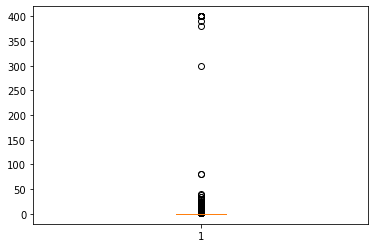

In [42]:
fig,ax=plt.subplots()
ax.boxplot([ps['Price']])
plt.show()

## ii. Do you expect apps on the play store to cost $200? Check out these cases


In [43]:
ps[ps['Price']>200]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600,10000,Paid,299.99,Everyone,Lifestyle,2018-07-21,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900,1000,Paid,379.99,Everyone,Lifestyle,2018-07-01,1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up


In [44]:
#YES, here in the data set have a $200 price 

## iii. After dropping the useless records, make the suitable plot again to identify outliers

In [45]:
ps.drop([4197,4362,4367,5351,5354,5355,5356,5357,5358,5359,5362,5364,5366,5369,5373],axis=0,inplace=True)

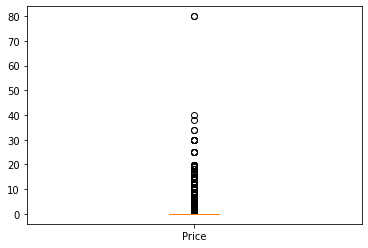

In [46]:
fig,ax=plt.subplots()
ax.boxplot([ps['Price']])
ax.set_xticklabels(['Price'])
plt.show()

## iv. Limit data to records with price < $30

In [49]:
ps[ps['Price']>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000,1000,Paid,79.99,Everyone,Medical,2018-06-18,19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000,1000,Paid,33.99,Everyone,Medical,2017-10-02,2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000,1000,Paid,79.99,Everyone,Medical,2018-06-18,19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000,1000,Paid,33.99,Everyone,Medical,2017-10-02,2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300,100,Paid,39.99,Everyone,Medical,2018-04-04,3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800,1000,Paid,37.99,Everyone,Lifestyle,2017-07-18,1.0,4.0.3 and up


In [50]:
ps=ps.drop([2253,2301,2365,2402,2414,5360],axis='rows')

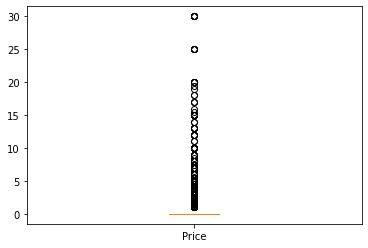

In [51]:
fig,ax=plt.subplots()
ax.boxplot([ps['Price']])
ax.set_xticklabels(['Price'])
plt.show()

## B. Reviews column

## i. Make suitable plot

<ipython-input-52-a55f9e70acaf>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0,10,20,30,40,50,60,70])


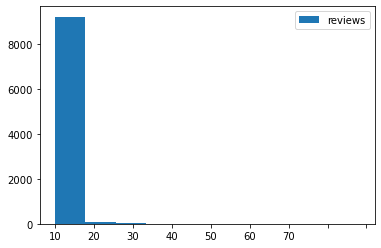

In [52]:
fig,ax=plt.subplots()
ax.hist(ps['Reviews'],label='reviews')
ax.set_xticklabels([0,10,20,30,40,50,60,70])
ax.legend()
plt.show()

In [53]:
ps.shape

(9338, 13)

## ii. Limit data to apps with < 1 Million reviews


In [54]:
ps[ps['Reviews']>1000000].index

Int64Index([  139,   152,   189,   194,   201,   293,   297,   335,   336,
              338,
            ...
             9843,  9851,  9853,  9860, 10186, 10190, 10200, 10327, 10636,
            10707],
           dtype='int64', length=704)

In [55]:
ps.drop(index=ps[ps['Reviews']>1000000].index,axis='rows',inplace=True)

In [56]:
ps.shape

(8634, 13)

## c. Installs

## i. What is the 95th percentile of the installs?

In [57]:
_95th=np.percentile(ps['Installs'],95)
_95th

10000000.0

## ii. Drop records having a value more than the 95th percentile

In [58]:
ps[ps['Installs']>10000000].index

Int64Index([    3,   143,   188,   192,   225,   292,   346,   348,   369,
              389,
            ...
             9844, 10010, 10196, 10253, 10378, 10408, 10429, 10513, 10549,
            10647],
           dtype='int64', length=199)

In [59]:
ps.drop(index=ps[ps['Installs']>10000000].index,axis='rows',inplace=True)

In [60]:
ps.shape

(8435, 13)

## Data analysis to answer business questions


# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

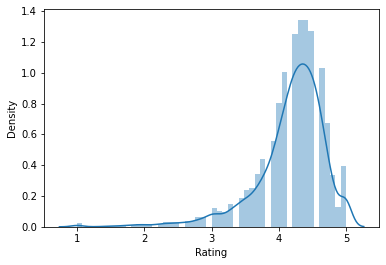

In [61]:
sns.distplot(ps['Rating'])


In [62]:
ps['Rating'].skew()

-1.7434270330647985

In [63]:
ps.Rating.median(),ps.Rating.mean()

(4.3, 4.170800237107298)

## b. What is the implication of this on your analysis?


In [64]:
ps.Rating.mode()

0    4.3
dtype: float64

## 6. What are the top Content Rating values? 

## a. Are there any values with very few records?

In [65]:
ps['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

## b. If yes, drop those as they won’t help in the analysis

In [74]:
#Replacing unwanted values with NaN
cr=[]
for k in ps['Content Rating']:
    cr.append(k.replace('Adults only 18+','NaN').replace('Unrated','NaN'))
ps["Content Rating"]=cr

In [75]:
# Droping the NaN values.
temp2 = ps[ps["Content Rating"] == 'NaN'].index
ps.drop(labels=temp2, inplace=True)
print('droped cols',temp2)


droped cols Int64Index([], dtype='int64')


In [76]:
ps['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

## Task 7. Effect of size on rating¶


### a. Make a joinplot to understand the effect of size on rating

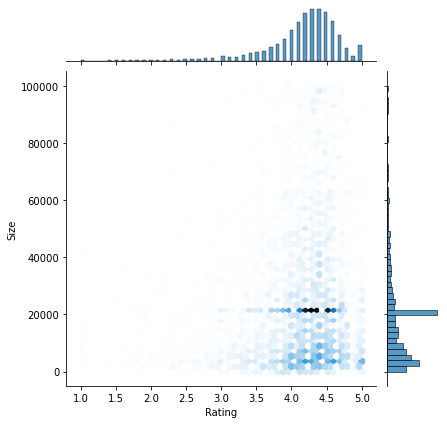

In [77]:
sns.jointplot(y ='Size', x ='Rating', data = ps, kind ='hex')

### b. Do you see any patterns?

##### Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.

### c. How do you explain the pattern?¶


##### Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating.

## 8. Effect of price on rating

## a. Make a jointplot (with regression line)

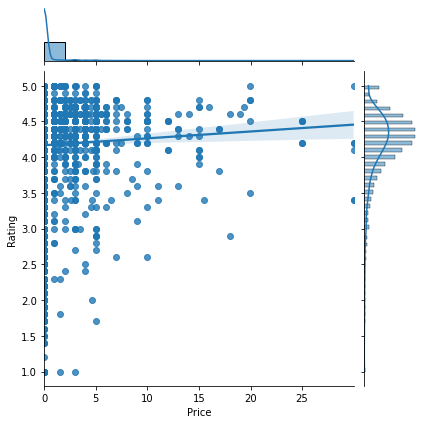

In [78]:
sns.jointplot(x='Price', y='Rating', data=ps, kind='reg')
plt.show()

## b. What pattern do you see?

## Generally on increasing the Price, Rating remains almost constant greater than 4.

## c. How do you explain the pattern?

### Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

In [79]:
ps.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204666,0.736038,-0.073446
Size,0.058076,0.204666,1.000000,0.190739,-0.001054
Installs,0.118414,0.736038,0.190739,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


## d. Replot the data, this time with only records with price > 0 

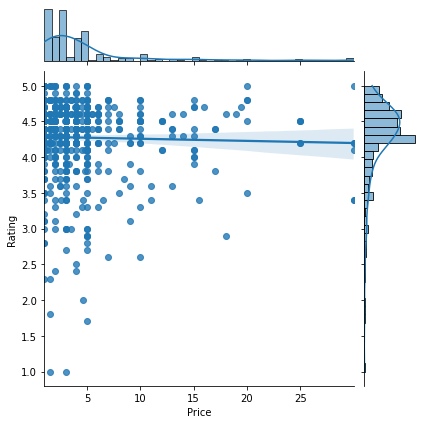

In [80]:
ps1=ps.loc[ps.Price>0]
sns.jointplot(x='Price', y='Rating', data=ps1, kind='reg')
plt.show()

## e. Does the pattern change?

Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

In [81]:
ps1.corr()


,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.095986,0.117942,0.063960,-0.025975
Reviews,0.095986,1.000000,0.163959,0.787628,-0.049764
Size,0.117942,0.163959,1.000000,0.119255,0.024912
Installs,0.063960,0.787628,0.119255,1.000000,-0.057710
Price,-0.025975,-0.049764,0.024912,-0.057710,1.000000


## f. What is your overall inference on the effect of price on the rating

Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

## 9. Look at all the numeric interactions together –

# a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

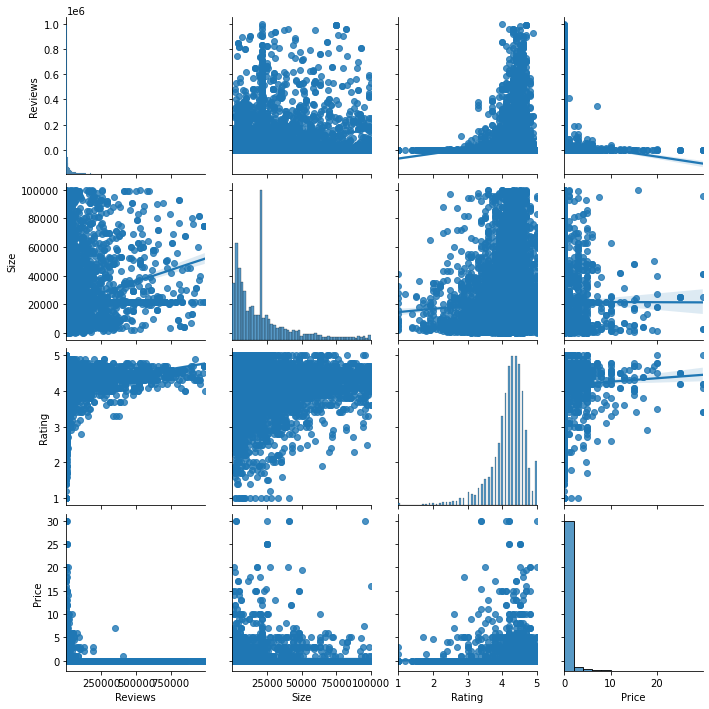

In [82]:
sns.pairplot(ps, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

## Task 10. Rating vs. content rating

a. Make a bar plot displaying the rating for each content rating

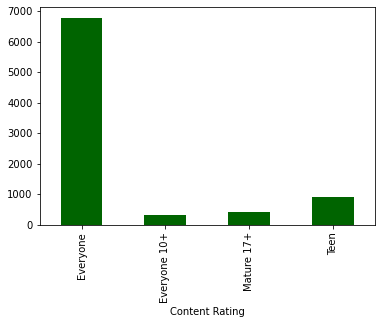

In [83]:
ps.groupby(['Content Rating'])['Rating'].count().plot.bar(color="darkgreen")
plt.show()

b. Which metric would you use? Mean? Median? Some other quantile?

We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

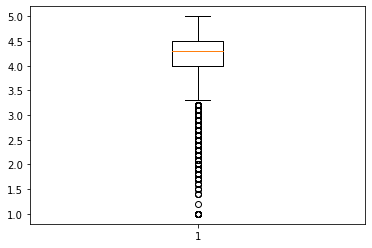

In [84]:
plt.boxplot(ps['Rating'])
plt.show()

c. Choose the right metric and plot

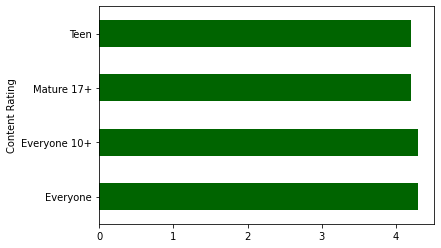

In [85]:
ps.groupby(['Content Rating'])['Rating'].median().plot.barh(color="darkgreen")
plt.show()

## Task 11. Content rating vs. size vs. rating – 3 variables at a time¶


a. Create 5 buckets (20% records in each) based on Size

In [89]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
ps['Bucket Size'] = pd.cut(ps['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(ps, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each 
combination

In [76]:
temp3=pd.pivot_table(ps, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp3

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


c. Make a heatmap of this

i. Annotated

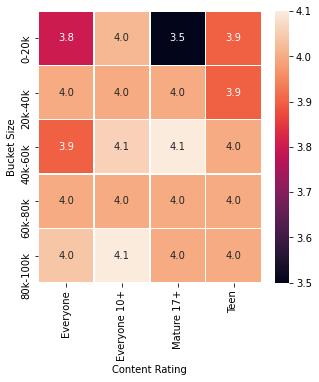

In [77]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

ii. Greens color map

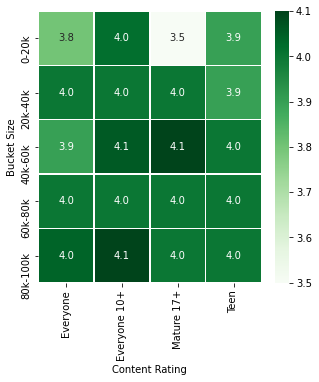

In [78]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(temp3, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some

Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories.